<a href="https://colab.research.google.com/github/Mwaba27/My-first-project/blob/main/Customer_Segmentation_in_Zambia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Data Preparation**

In [ ]:
import numpy as np
import pandas as pd

# Generate demographic features
num_data_points = 10000
age = np.random.normal(loc=30, scale=10, size=num_data_points)
gender = np.random.choice(['Male', 'Female'], size=num_data_points)
education_level = np.random.choice(['Primary', 'Secondary', 'Tertiary'], size=num_data_points)
marital_status = np.random.choice(['Single', 'Married', 'Divorced', 'Widowed'], size=num_data_points)

# Generate socio-economic features
income = np.random.lognormal(mean=10, sigma=2, size=num_data_points)
occupation = np.random.choice(['Agriculture', 'Manufacturing', 'Services', 'Government'], size=num_data_points)
urban_rural = np.random.choice(['Urban', 'Rural'], size=num_data_points, p=[0.3, 0.7])  # Adjust probabilities based on Zambia's demographics
housing_type = np.random.choice(['Own', 'Rent', 'Traditional'], size=num_data_points)

# Generate behavioral features
spending_habits = np.random.choice(['High Spender', 'Medium Spender', 'Low Spender'], size=num_data_points)
brand_preference = np.random.choice(['Local Brands', 'International Brands', 'Mixed'], size=num_data_points)

# Create a pandas DataFrame
data = pd.DataFrame({'Age': age, 'Gender': gender, 'Education Level': education_level,
                     'Marital Status': marital_status, 'Income': income, 'Occupation': occupation,
                     'Urban/Rural': urban_rural, 'Housing Type': housing_type,
                     'Spending Habits': spending_habits, 'Brand Preference': brand_preference})

# Print the dataset
data.head()

,Age,Gender,Education Level,Marital Status,Income,Occupation,Urban/Rural,Housing Type,Spending Habits,Brand Preference
0,12.692154,Female,Tertiary,Married,38128.400234,Agriculture,Rural,Traditional,High Spender,International Brands
1,8.056657,Male,Secondary,Widowed,131176.228900,Manufacturing,Urban,Traditional,High Spender,Mixed
2,10.540147,Female,Tertiary,Single,1585.329100,Agriculture,Rural,Own,High Spender,Mixed
3,19.703166,Male,Tertiary,Divorced,6387.853928,Services,Rural,Own,Low Spender,Local Brands
4,29.207162,Female,Secondary,Widowed,41205.760843,Manufacturing,Rural,Own,Medium Spender,Local Brands


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Your existing code to generate the DataFrame 'data' goes here

# One-hot encode categorical columns
categorical_cols = ['Gender', 'Education Level', 'Marital Status', 'Occupation', 'Urban/Rural', 'Housing Type', 'Spending Habits', 'Brand Preference']
data_encoded = pd.get_dummies(data, columns=categorical_cols)

# Apply StandardScaler to the encoded data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_encoded)

# Print the first few rows of the scaled data (optional)
print(scaled_data[:5])

[[-1.72478472 -0.10789713  1.00722611 -1.00722611 -0.70578137 -0.70896375
   1.41527489 -0.57858195  1.75072575 -0.57627255 -0.58335487  1.74978239
  -0.59413541 -0.56811207 -0.5756567   0.65527721 -0.65527721 -0.71135371
  -0.70181003  1.41209489  1.42392089 -0.71678125 -0.7022862   1.41655023
  -0.71406567 -0.70133395]
 [-2.18892043 -0.03045855 -0.99282573  0.99282573 -0.70578137  1.41050935
  -0.70657652 -0.57858195 -0.57119169 -0.57627255  1.71422241 -0.57149964
  -0.59413541  1.76021608 -0.5756567  -1.52607169  1.52607169 -0.71135371
  -0.70181003  1.41209489  1.42392089 -0.71678125 -0.7022862  -0.70594037
  -0.71406567  1.42585426]
 [-1.94025743 -0.13830991  1.00722611 -1.00722611 -0.70578137 -0.70896375
   1.41527489 -0.57858195 -0.57119169  1.73529002 -0.58335487  1.74978239
  -0.59413541 -0.56811207 -0.5756567   0.65527721 -0.65527721  1.40577042
  -0.70181003 -0.70816771  1.42392089 -0.71678125 -0.7022862  -0.70594037
  -0.71406567  1.42585426]
 [-1.02279729 -0.13431304 -0.99

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # Reduce to 2 components for 2D plotting
pca_data = pca.fit_transform(scaled_data)


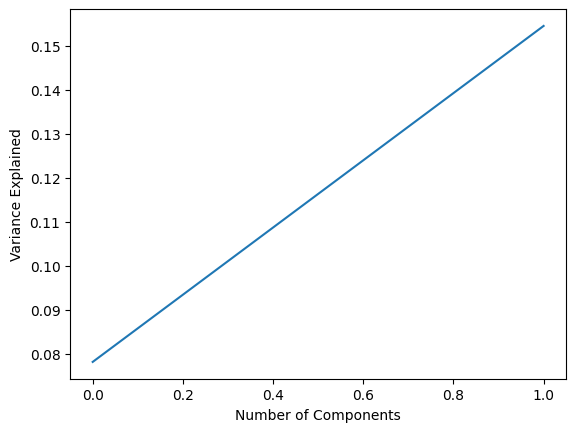

In [ ]:
import matplotlib.pyplot as plt
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance Explained')
plt.show()


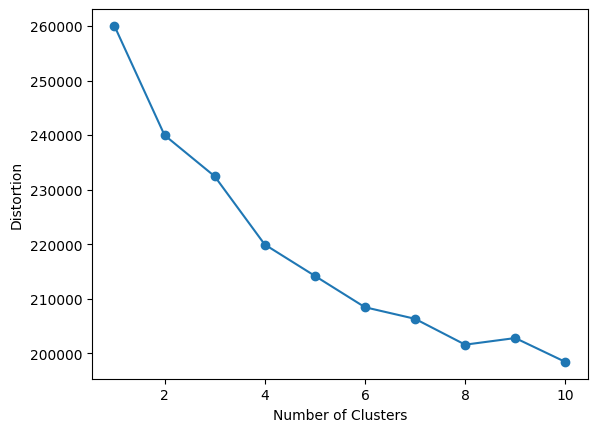

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

distortions = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_data)
    distortions.append(kmeans.inertia_)

plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=4)  # Assuming 4 clusters
clusters = kmeans.fit_predict(scaled_data)


In [ ]:
data['Cluster'] = clusters


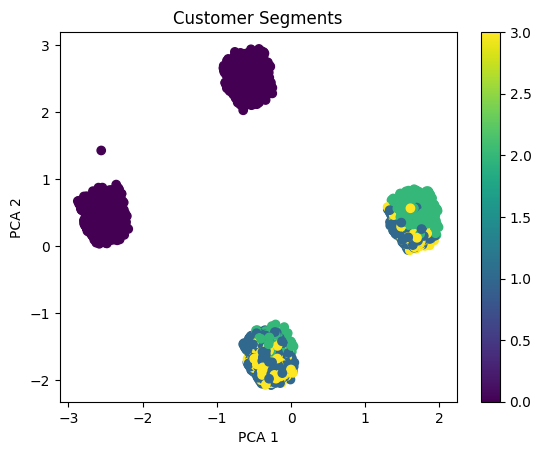

In [ ]:
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Customer Segments')
plt.colorbar()
plt.show()


In [ ]:
pip install dash


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 48.2 MB/s eta 0:00:00


In [21]:
import dash
from dash import dcc, html
import plotly.express as px

app = dash.Dash(__name__)

fig = px.scatter(x=pca_data[:, 0], y=pca_data[:, 1], color=clusters, title="Customer Segments",
                 labels={'x': 'PCA 1', 'y': 'PCA 2'})

app.layout = html.Div(children=[
    html.H1(children='Customer Segmentation Dashboard'),

    dcc.Graph(
        id='cluster-graph',
        figure=fig
    )
])

if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>